## Objective : predict healthcare cost using patients data

### data points:
     1. Patient ID - Unique patient identifier
     2. Age - Age of a patient
     3. BMI - Body mass index of a patient
     4. SmokingStatus - indicates whether patients smokes or not (Non-Smoker, Smoker)
     5. ChronicCondition - indication of chronic condition (Yes, No)
     6. AnnualCost - amount spent on a hospital to recover

### Import Standard Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and Understand the data

In [183]:
costs = pd.read_csv("healthcare_costs.csv")
costs.head()

,PatientID,Age,BMI,SmokingStatus,ChronicCondition,AnnualCost
0,1001,58,37.0,Non-Smoker,Yes,6725.12
1,1002,71,33.1,Smoker,Yes,17359.16
2,1003,48,28.2,Smoker,Yes,7259.34
3,1004,34,18.8,Non-Smoker,Yes,12287.21
4,1005,62,38.8,Non-Smoker,Yes,8334.85


### Since, PatientID is just an identifier, it could be dropped from the dataset

In [185]:
costs = costs.drop('PatientID',axis=1)

### Exploratory Data Analysis

In [187]:
#check if there are any null values
costs.isna().sum().sort_values()

Age                 0
BMI                 0
SmokingStatus       0
ChronicCondition    0
AnnualCost          0
dtype: int64

In [188]:
#check for descriptive statistics
costs.describe()

,Age,BMI,AnnualCost
count,50.000000,50.000000,50.000000
mean,51.860000,29.260000,10081.385200
std,17.700467,6.101923,2575.747173
min,21.000000,18.800000,5150.220000
25%,40.000000,24.500000,8223.007500
50%,50.500000,29.900000,9978.370000
75%,67.500000,34.025000,11866.262500
max,79.000000,39.300000,17359.160000


In [189]:
#check for datatypes
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               50 non-null     int64  
 1   BMI               50 non-null     float64
 2   SmokingStatus     50 non-null     object 
 3   ChronicCondition  50 non-null     object 
 4   AnnualCost        50 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


### Age Vs BMI

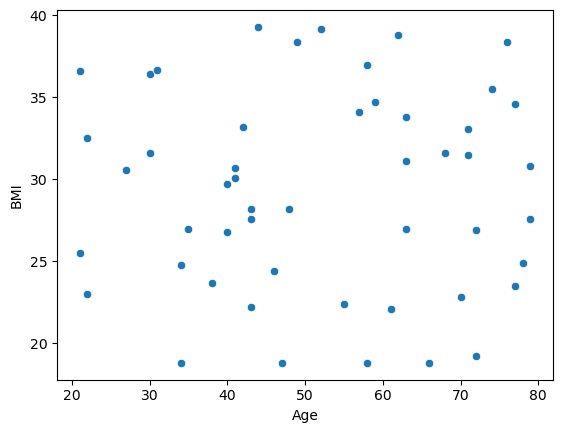

In [191]:
sns.scatterplot(x="Age",y="BMI", data=costs)
plt.show()

#### weekly correlated (no correlation)

### Age Vs Annual Cost (Hue = SmokingStatus)

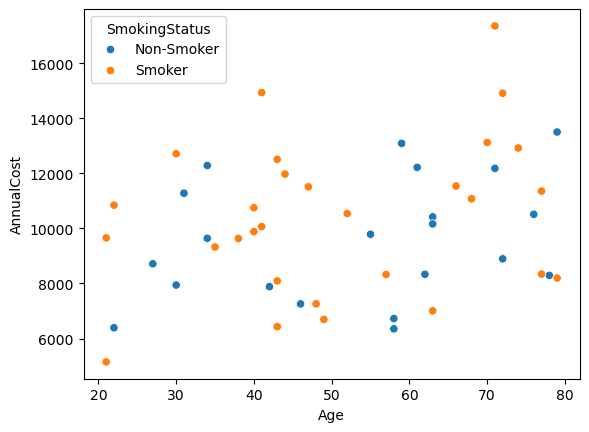

In [194]:
sns.scatterplot(x="Age",y="AnnualCost", hue='SmokingStatus', data=costs)
plt.show()

#### Slightly correlated with hue as SmokingStatus

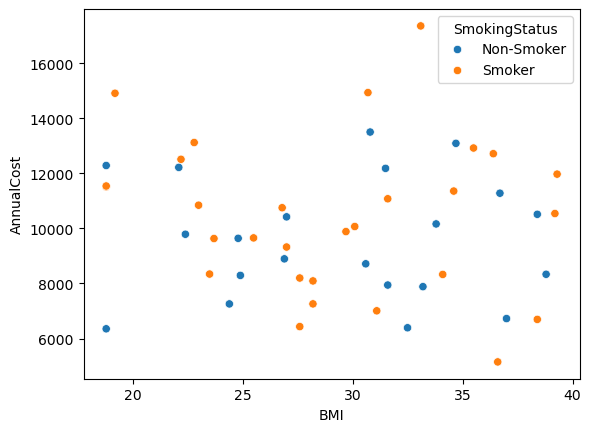

In [196]:
sns.scatterplot(x="BMI",y="AnnualCost",hue="SmokingStatus", data=costs)
plt.show()

#### there is no much of interpretation from the above graph

### Distribution of Smoking Status

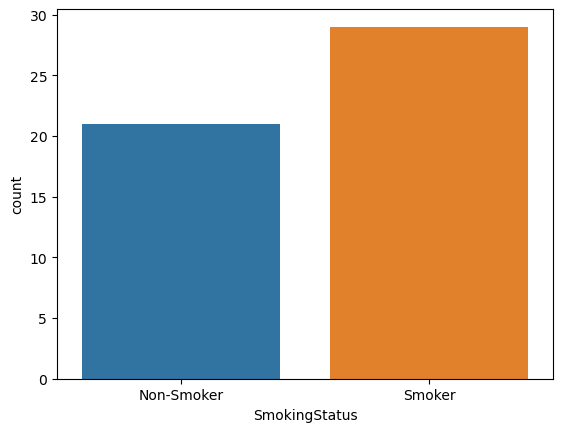

In [199]:
sns.countplot(data=costs,x="SmokingStatus", hue="SmokingStatus")
plt.show()

#### Distribution is not overly Skewed (Smokers are more compared to Non-Smokers)

### Distribution of ChronicCondtion

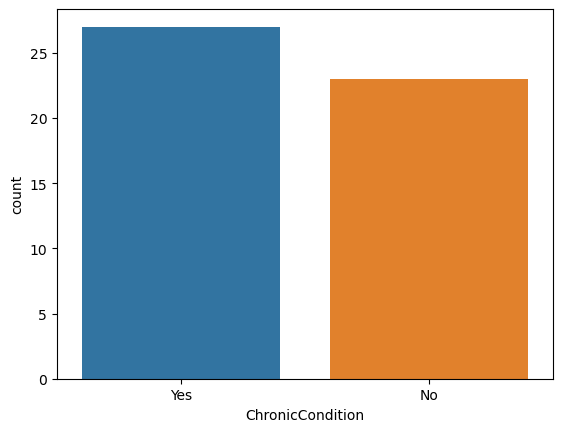

In [202]:
sns.countplot(data=costs,x="ChronicCondition",hue="ChronicCondition")
plt.show()

#### Distribution is not overly Skewed (Yes are more compared to No in ChronicCondition Feature)

### Box Plot -  Checkfor an outliers in AnnualCost(Target Variable)

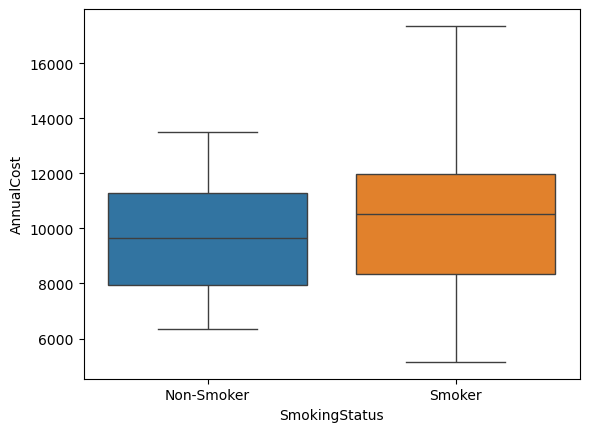

In [205]:
sns.boxplot(data=costs, x="SmokingStatus",y="AnnualCost",hue="SmokingStatus")
plt.show()

#### AnnualCost is more when SmokingStatus is a Smoker

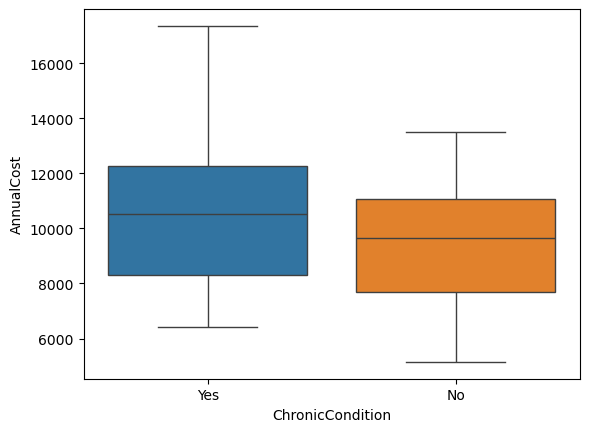

In [207]:
sns.boxplot(data=costs, x="ChronicCondition",y="AnnualCost",hue="ChronicCondition")
plt.show()

#### AnnualCost is more when ChronicCondition is a Yes

### Distribution between Age and ChronicCondition

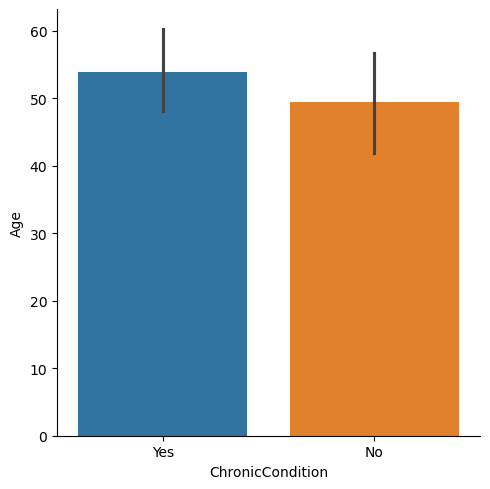

In [210]:
sns.catplot(data=costs, x="ChronicCondition", y="Age",kind="bar",hue="ChronicCondition")
plt.show()

#### ChronicCondtion occurs is more in aged patients

### Bi-Variate Analysis (How does SmokingCondition and ChronicCondtion Relate with AnnualCost

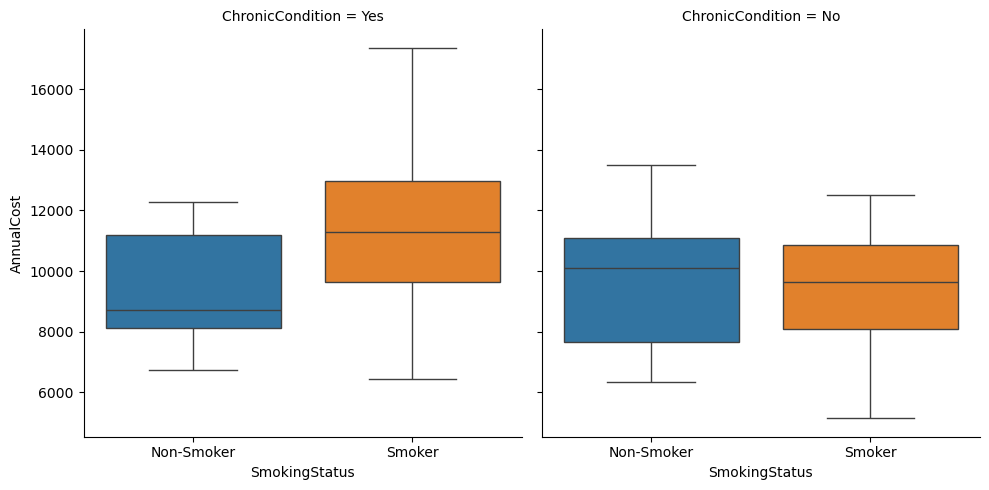

In [213]:
sns.catplot(data=costs, x="SmokingStatus",y="AnnualCost",col="ChronicCondition",kind="box",hue="SmokingStatus")
plt.show()

#### When there is a chronicConditon and Patient is a Smoker, The AnnualCost is more 

###### The median AnnualCost for patients with SmokingCondtion='Smoker' and ChronicCondtion='Yes' is more compared to patients with SmokingCondtion='Smoker' and ChronicCondtion='No'

### Statistics

In [232]:
#check for correlation
costs[['Age', 'BMI', 'AnnualCost']].corr()

,Age,BMI,AnnualCost
Age,1.000000,-0.006628,0.262913
BMI,-0.006628,1.000000,-0.092863
AnnualCost,0.262913,-0.092863,1.000000


#### There is no correlation between Age and BMI, but slight correlation between Age and AnnualCost

In [242]:
#check for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

X = sm.add_constant(costs[['Age', 'BMI']])  # include constant/intercept
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns
print(vif)

         VIF feature
0  33.414076   const
1   1.000044     Age
2   1.000044     BMI


#### There is no multi-collinearity between Age and BMI since VIF is < 5

##### VIF checks whether your predictors are redundant or highly correlated with each other, which can hurt your model stability.

##### Target Variable(AnnualCost) Shouldn't be added as it will give invalid VIF

### Machine Learning Model (Regression)